In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pit

In [85]:
data = pd.read_csv('data_master/mnist_data/train.csv')

In [96]:
# converting the pandas data to numpy array to 
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

# m -> rows === total number of examples we have in our data
# n -> columns === each images is 28x28 pixels values
#                  images are row flattened thus 785 (784 images pixel values + 1 images labels(y))
# (42000, 785)

# currently we have our feature in row fashion, but we want it in column fashion
#  (785, 10000) and first row will be Y.


data_test = data[0: 1000].T
Y_test = data_test[0]
X_test = data_test[1:785]


data_train = data[1000: m].T
Y_train = data_train[0]
X_train = data_train[1:785]

5


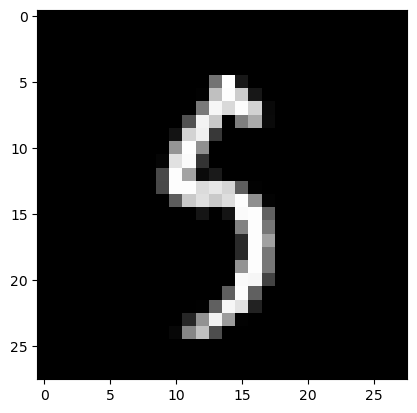

In [100]:
# train data visual
index = np.random.randint(0, X_train.shape[1])
pit.imshow(X_train[:, index].reshape(28, 28), cmap = 'gray')
print(Y_train[index])
pit.show()

9


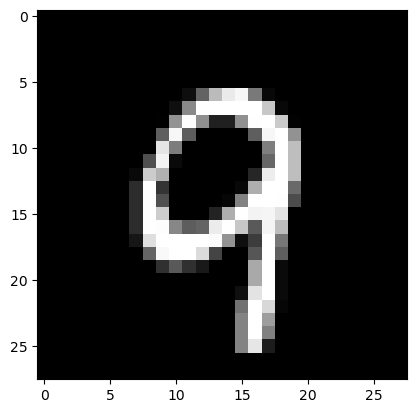

In [99]:
# test data visual
index = np.random.randint(0, X_test.shape[1])
pit.imshow(X_test[:, index].reshape(28, 28), cmap = 'gray')
print(Y_test[index])
pit.show()

In [21]:
X_train.shape

(784, 41000)

In [24]:
Y_train

array([4, 1, 4, ..., 3, 3, 9], dtype=int64)

In [25]:
# over view of network

# 1. initialize all parameters W, b
#    our NN will have 2 hidden layer, 10neuron/layer, 
#    -> input layer:     X = a0
#    -> hidden layer 1: a0[784x1], W1[784x10], b1[10x1]
#    -> hidden layer 2: a1[10x1], W2[10x10], b2[10X1]
#    -> output layer:   Y = a2 = softmax(z2)

#2.  forward propagation
#    Z1 = W1.T*a0 + b1
#    a1 = sigmoid(Z1)
#    Z2 = W2.T*a1 + b2
#    a2 = softmax(z2)

#3.  backward propagation
#    

In [101]:
def initParams():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

In [102]:
def sig(z):
    return 1/(1 + np.exp(-z))

In [103]:
def derivativeSig(z):
    return sig(z)*(1-sig(z))

In [104]:
def softMax(z):
    A = np.exp(z) / np.sum(np.exp(z), axis = 0)
    return A

In [105]:
# since our Y's are in row fashion [......], without one hot encode,
# but we need it in column fashion, to work, with one hot encode
def oneHot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    

In [106]:
def forwardPropagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    a1 = sig(Z1)
    
    Z2 = W2.dot(a1) + b2
    a2 = softMax(Z2)
    
    return Z1, a1, Z2, a2

In [107]:
def backPropagation(Z1, a1, Z2, a2, W1, W2, X, Y):
    oneHotY = oneHot(Y)
    dZ2 = a2 - oneHotY
    dW2 = 1/m * dZ2.dot(a1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims = True)
    
    dZ1 = W2.T.dot(dZ2)*derivativeSig(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims = True)
    
    return dW1, db1, dW2, db2

In [108]:
def updateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha *db2
    
    return W1, b1, W2, b2

In [109]:
def getPredictions(a2):
    return np.argmax(a2, 0)

In [110]:
def getAccuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [112]:
def model(X, Y, iterations, alpha):
    W1, b1, W2, b2 = initParams()
    
    for i in range (iterations):
        Z1, a1, Z2, a2 = forwardPropagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backPropagation(Z1, a1, Z2, a2, W1, W2, X, Y)
        W1, b1, W2, b2 = updateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if(i%50 == 0):
            print("Iteration: ", i)
            predictions = getPredictions(a2)
            print(getAccuracy(predictions, Y))
    return W1, b1, W2, b2

In [113]:
W1, b1, W2, b2 = model(X_train, Y_train, 1000, 0.1)

C:\Users\16jul\AppData\Local\Temp\ipykernel_23128\273802051.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


Iteration:  0
[9 5 9 ... 5 5 5] [1 8 1 ... 3 6 1]
0.10429268292682926
Iteration:  50
[1 9 9 ... 7 0 1] [1 8 1 ... 3 6 1]
0.25453658536585366
Iteration:  100
[1 9 1 ... 0 6 1] [1 8 1 ... 3 6 1]
0.3864146341463415
Iteration:  150
[1 9 1 ... 7 6 1] [1 8 1 ... 3 6 1]
0.4408048780487805
Iteration:  200
[1 7 1 ... 0 6 1] [1 8 1 ... 3 6 1]
0.4795609756097561
Iteration:  250
[1 7 1 ... 3 6 1] [1 8 1 ... 3 6 1]
0.5039756097560976
Iteration:  300
[1 7 1 ... 3 6 1] [1 8 1 ... 3 6 1]
0.5304390243902439
Iteration:  350
[1 5 1 ... 3 6 1] [1 8 1 ... 3 6 1]
0.5536585365853659
Iteration:  400
[1 5 1 ... 3 6 1] [1 8 1 ... 3 6 1]
0.5728536585365853
Iteration:  450
[1 5 1 ... 3 6 1] [1 8 1 ... 3 6 1]
0.5915853658536585
Iteration:  500
[1 5 1 ... 3 6 1] [1 8 1 ... 3 6 1]
0.6085365853658536
Iteration:  550
[1 5 1 ... 3 6 1] [1 8 1 ... 3 6 1]
0.6197317073170732
Iteration:  600
[1 5 1 ... 3 6 1] [1 8 1 ... 3 6 1]
0.6315365853658537
Iteration:  650
[1 5 1 ... 3 6 1] [1 8 1 ... 3 6 1]
0.6443658536585366
Iterati

In [150]:
def makePrediction(X, W1, b1, W2, b2):
    _, _, _, Ycap = forwardPropagation(W1, b1, W2, b2, X)
    # print(Ycap)
    predictions = getPredictions(Ycap)
    return predictions

In [186]:
def testPredictions(index, W1, b1, W2, b2):
    # currentImage = X_test[:, index] -> gives 1D array, but 2D array is needed
    # currentImage = X_test[:, index, None] -> gives 2D array
    currentImage = X_test[:, index, None] 
    predictions = makePrediction(currentImage, W1, b1, W2, b2)
    label = Y_test[index]
    if(index%50 == 0):
        print("Predictions: ", predictions)
        print("Label: ", label)
        
    return predictions == label

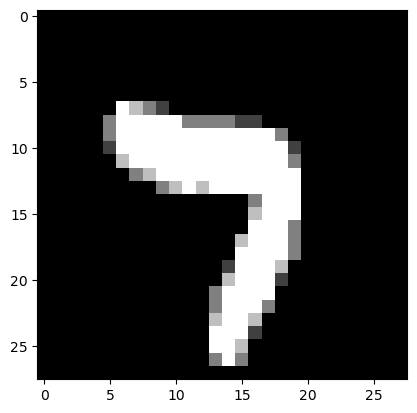

Predictions:  [7]
Label:  7


C:\Users\16jul\AppData\Local\Temp\ipykernel_23128\273802051.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


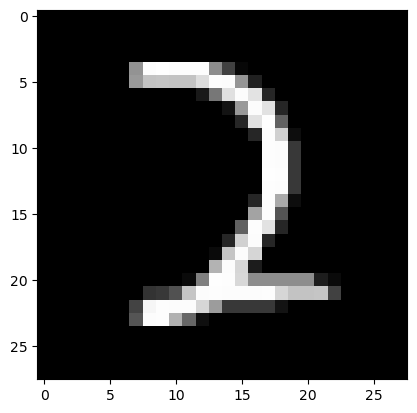

Predictions:  [5]
Label:  2


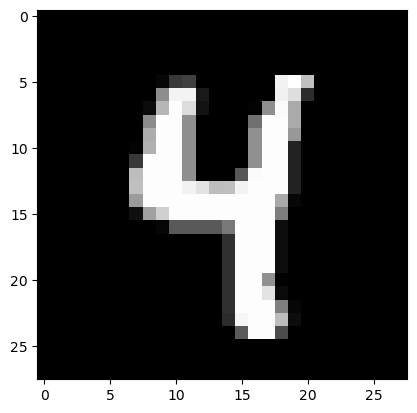

Predictions:  [9]
Label:  4


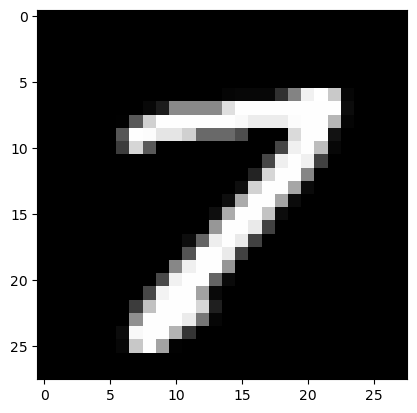

Predictions:  [8]
Label:  7


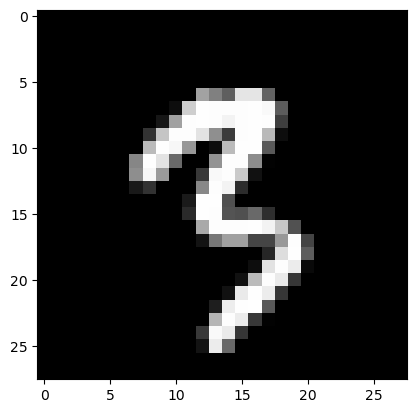

Predictions:  [5]
Label:  3


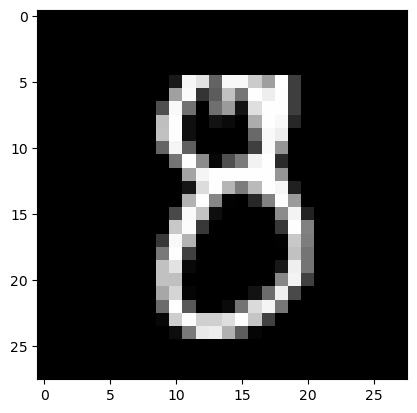

Predictions:  [3]
Label:  8


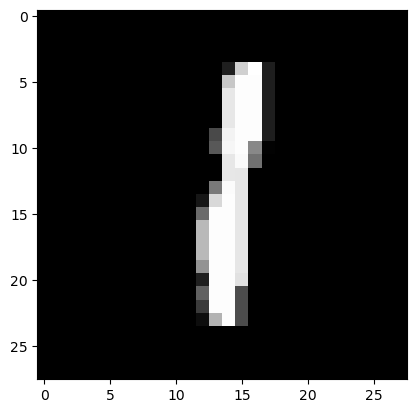

Predictions:  [1]
Label:  1


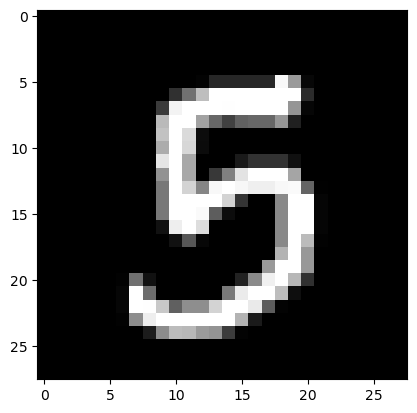

Predictions:  [5]
Label:  5


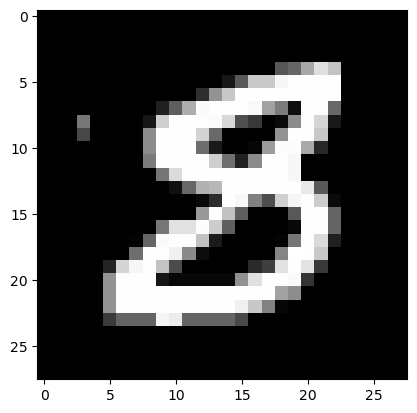

Predictions:  [5]
Label:  8


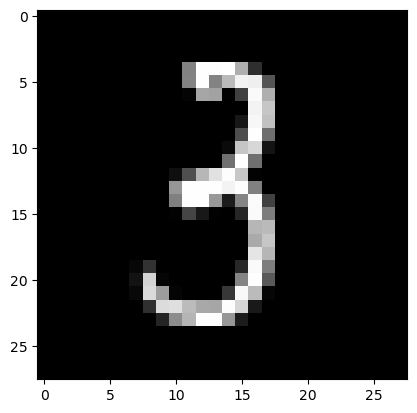

Predictions:  [3]
Label:  3


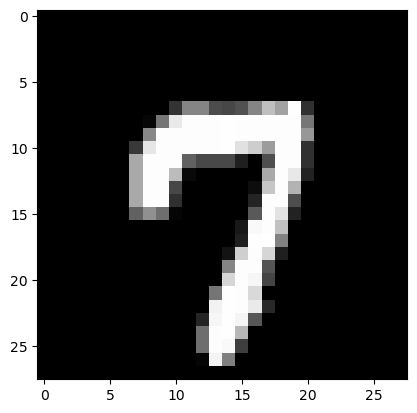

Predictions:  [7]
Label:  7


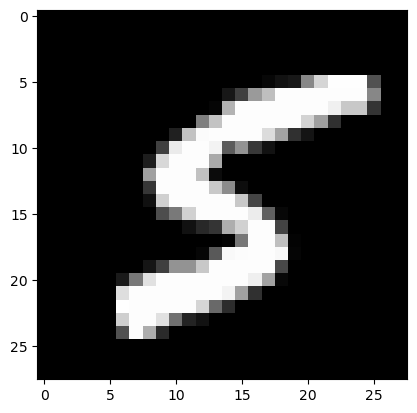

Predictions:  [5]
Label:  5


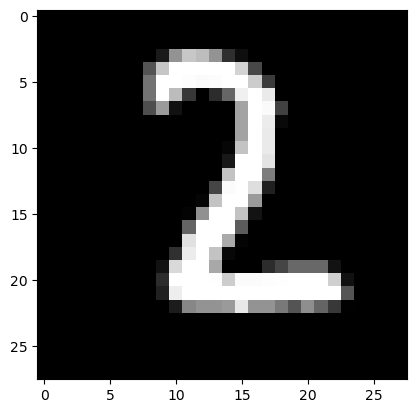

Predictions:  [2]
Label:  2


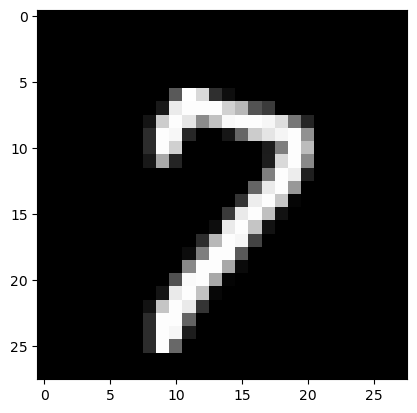

Predictions:  [7]
Label:  7


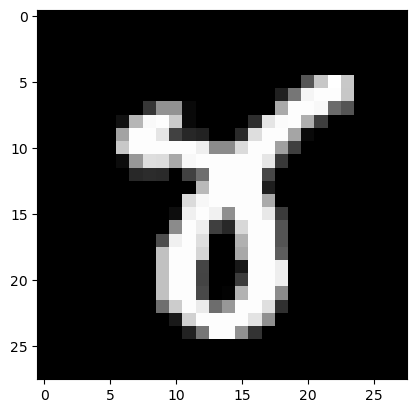

Predictions:  [8]
Label:  8


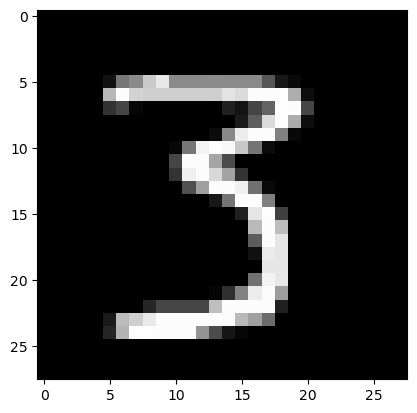

Predictions:  [3]
Label:  3


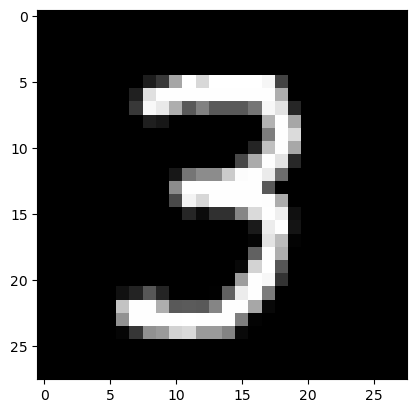

Predictions:  [3]
Label:  3


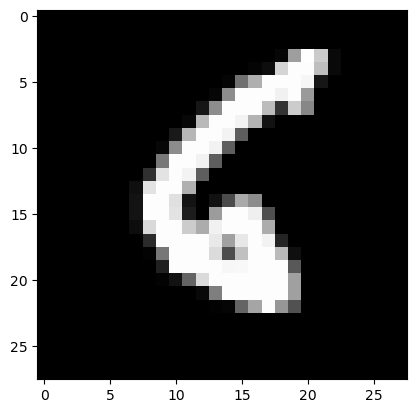

Predictions:  [2]
Label:  6


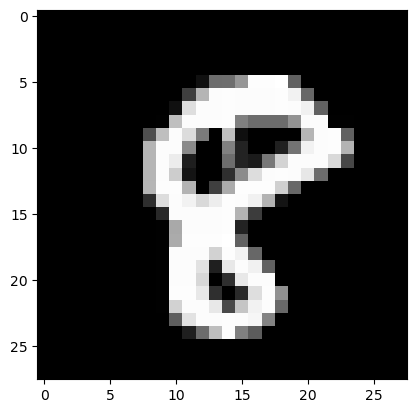

Predictions:  [8]
Label:  8


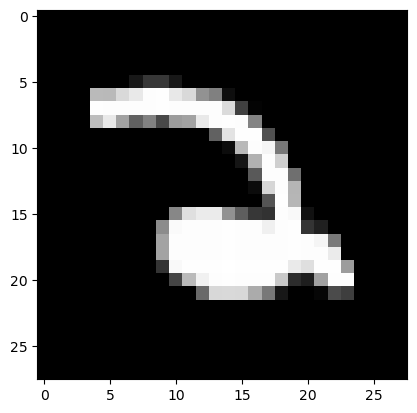

Predictions:  [6]
Label:  2
Test Accuracy:  67.6


In [188]:
# making predictions
correctPred = 0
for i in range(1000):
    if(i%50 == 0):
        pit.imshow(X_test[:, i].reshape(28, 28), cmap = 'gray')
        pit.show()
        
    chk = testPredictions(i, W1, b1, W2, b2)
    if(chk):
        correctPred += 1

print("Test Accuracy: ", correctPred*100/X_test.shape[1])